In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### Check GPU availability

In [2]:
# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### Hyper parameters

In [3]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

### Traing and test data

In [4]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, transform=transforms.ToTensor()
)

# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False
)

100%|██████████| 9912422/9912422 [00:29<00:00, 340428.37it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1375479.11it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1125050.88it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8770961.68it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
print("Train data: ", train_dataset.train_data.shape)
print("Test data: ", test_dataset.test_data.shape)

Train data:  torch.Size([60000, 28, 28])
Test data:  torch.Size([10000, 28, 28])


/Users/harryxiong24/anaconda3/lib/python3.11/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/harryxiong24/anaconda3/lib/python3.11/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


### Check data

In [6]:
images, labels = next(iter(train_loader))

In [7]:
print(images.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


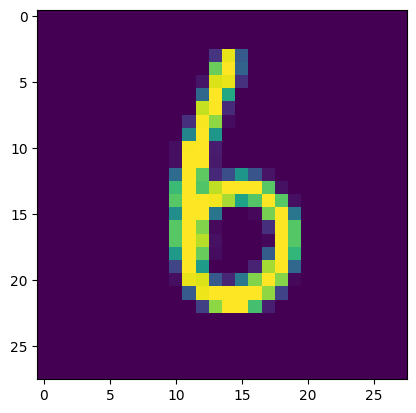

In [8]:
plt.imshow(images[0, 0, :, :])

### Defining the model

In [9]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc = nn.Linear(7 * 7 * 32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out


model = ConvNet(num_classes).to(device)

In [10]:
print(model)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


### Check parameters of the model

In [11]:
print(model.layer1.parameters)

<bound method Module.parameters of Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)>


In [12]:
# Check the convolution parameters
list(model.layer1.parameters())[0].shape

torch.Size([16, 1, 5, 5])

### Training

In [13]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(
                "Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}".format(
                    epoch + 1, num_epochs, i + 1, total_step, loss.item()
                )
            )

Epoch [1/5], Step [100/600], Loss: 0.4243
Epoch [1/5], Step [200/600], Loss: 0.2869
Epoch [1/5], Step [300/600], Loss: 0.0990
Epoch [1/5], Step [400/600], Loss: 0.2084
Epoch [1/5], Step [500/600], Loss: 0.1158
Epoch [1/5], Step [600/600], Loss: 0.0197
Epoch [2/5], Step [100/600], Loss: 0.0418
Epoch [2/5], Step [200/600], Loss: 0.0706
Epoch [2/5], Step [300/600], Loss: 0.1404
Epoch [2/5], Step [400/600], Loss: 0.1658
Epoch [2/5], Step [500/600], Loss: 0.0468
Epoch [2/5], Step [600/600], Loss: 0.0356
Epoch [3/5], Step [100/600], Loss: 0.0377
Epoch [3/5], Step [200/600], Loss: 0.0169
Epoch [3/5], Step [300/600], Loss: 0.0380
Epoch [3/5], Step [400/600], Loss: 0.0380
Epoch [3/5], Step [500/600], Loss: 0.0853
Epoch [3/5], Step [600/600], Loss: 0.0432
Epoch [4/5], Step [100/600], Loss: 0.0624
Epoch [4/5], Step [200/600], Loss: 0.0725
Epoch [4/5], Step [300/600], Loss: 0.0143
Epoch [4/5], Step [400/600], Loss: 0.0052
Epoch [4/5], Step [500/600], Loss: 0.0947
Epoch [4/5], Step [600/600], Loss:

### Testing

In [15]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(
        "Test Accuracy of the model on the 10000 test images: {} %".format(
            100 * correct / total
        )
    )

Test Accuracy of the model on the 10000 test images: 99.08 %


In [16]:
# Save the model checkpoint
# torch.save(model.state_dict(), "model.ckpt")